In [2]:
#snowpat docs - https://patrick.leibersperger.gitlab-pages.wsl.ch/snowpat/indexspr/#usage
#https://patrick.leibersperger.gitlab-pages.wsl.ch/snowpat/api_reference/snowpat/

import snowpat.snowpackreader as spr
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [3]:
#Read snowpack pro data from path
pro_path = "/Users/travismorrison/Documents/GitHub/UAC-Snowpack/Validation_profiles/ATH20_10_05_2024_03_27_2025.pro"
pro = spr.readPRO(pro_path)


In [4]:

sh = pro.get_var('0514')
ht = pro.get_var('0501')
id = pro.get_var('0504')
rcl = pro.get_var('0606')
gt = pro.get_var('0513')
rho = pro.get_var('0502')
sn38 = pro.get_var('0532')
# all available dates
dates = pro.get_all_dates()


0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thickness'])
0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thickness'])
0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thickness'])
0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thickness'])
0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thickness'])
0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thickness'])
0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thickness'])
0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thickness'])
0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thickness'])
0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thickness'])
0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thickness'])
0504 is invalid
available codes are:
dict_keys(['layer middle', 'layer thick

In [5]:
def get_hst(pro):
    #get all heights
    ht = pro.get_var('0501')
    #find max ht on each day and return
    hst = np.zeros(len(ht))
    for ii in range(len(ht)):
        hst[ii] = np.max(ht[ii])

    return hst

def get_accumlation_periods(hst):
    model_interval = 15 #min
    interval = int(24*(60/model_interval)) #24 hours
    diff_hst = hst[interval:] - hst[:-interval] 
    dry_indices = np.where(diff_hst < 10)[0] #find where 24 hr interval is less than 10 cm - dry period
    accum_indices = np.setdiff1d(np.arange(len(diff_hst)), dry_indices)
    
    return accum_indices

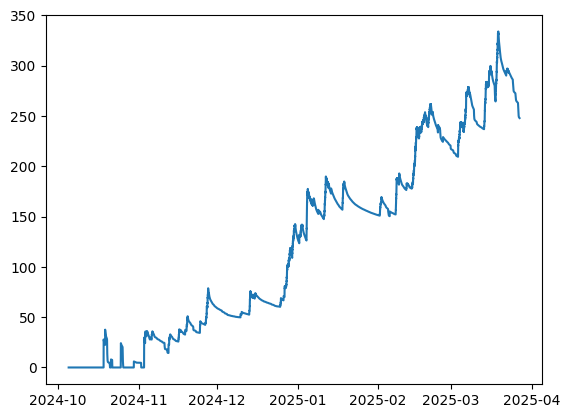

In [6]:


hst = np.zeros(len(ht))
for ii in range(len(ht)):
    hst[ii] = np.max(ht[ii])

#dt = pd.to_datetime(dt, format='%Y%m%d%H%M%S')
plt.plot(dates,hst)


In [7]:
#find dry periods
#compute differences in height greater than 10 cm
# Find where the difference in hst over an interval of 360 indices is greater than 10
model_interval = 15 #min
interval = int(24*(60/model_interval)) #24 hours
diff_hst = hst[interval:] - hst[:-interval] 
dry_indices = np.where(diff_hst < 10)[0] #find where 24 hr interval is less than 10 cm - dry period
#find accum periods
accum_indices = np.setdiff1d(np.arange(len(diff_hst)), dry_indices)
accum_dates = np.array(dates)[accum_indices]



In [19]:

#determine burial date
accum_end_index = np.where(np.diff(accum_indices)>1)[0]
#number of event total, dry and accum
num_events = len(accum_end_index) #36 events

#loop over each event
#for .. 
# track 1 layer for now

idx = 10 # We will need to loop over this for each layer 
num_new_elements = len(id[accum_indices[accum_end_index[idx]]]) - len(id[accum_indices[accum_end_index[idx-1]]])
#print(num_new_elements)
# get the last num new elements id
new_layer_id = id[accum_indices[accum_end_index[idx]]][-num_new_elements:]
#determine the max number of indices the lay could exist 
new_layer_idex_age = len(dates) - accum_indices[accum_end_index[idx]] #
#allocate new layer rcl will be each new elements critical cut length for each time step
new_ids = np.zeros((new_layer_idex_age,num_new_elements))
new_layer_rcl = np.zeros((new_layer_idex_age,num_new_elements))
new_layer_rho = np.zeros((new_layer_idex_age,num_new_elements))
new_layer_gt = np.zeros((new_layer_idex_age,num_new_elements))
new_layer_sn38 = np.zeros((new_layer_idex_age,num_new_elements))
new_layer_ht = np.zeros((new_layer_idex_age,num_new_elements))
new_layer_dt = dates[accum_indices[accum_end_index[idx]]:]
# Loop over layer intiation (storm) to current index
start = accum_indices[accum_end_index[idx]]
# needs to go to end of time -> is this right?
end = len(dates)
cnt = 0
for ii in range(start, end,1):
    #print(ii)
    #print(id[ii])
    #print(new_layer_id)

    # Find intersection and indices in current_ids
    common_ids, pro_layer_idx, _ = np.intersect1d(id[ii], new_layer_id, return_indices=True)

    #Track the critical cut length for each new layer
    padding = [None] * (num_new_elements - id[ii][pro_layer_idx].size)
    '''    print(num_new_elements)
    print(padding)
    print(id[ii][pro_layer_idx])'''
    new_ids[cnt][:] = np.concatenate((id[ii][pro_layer_idx], padding))
    new_layer_rcl[cnt][:] = np.concatenate((rcl[ii][pro_layer_idx], padding))
    new_layer_gt[cnt][:] = np.concatenate((gt[ii][pro_layer_idx], padding))
    new_layer_rho[cnt][:] = np.concatenate((rho[ii][pro_layer_idx], padding))
    new_layer_sn38[cnt][:] = np.concatenate((sn38[ii][pro_layer_idx], padding))
    new_layer_ht[cnt][:] = np.concatenate((ht[ii][pro_layer_idx], padding))
    #new_layer_dt[cnt][:] = np.array([dt[ii]] * num_new_elements)  # Use the same date for all new elements


    #determine weakest layer in the ID'd layer

    #Find relevant variables to track of this variable
    #depth
    #density
    #grain types


    cnt +=1

print(new_ids.shape)

(9962, 3)


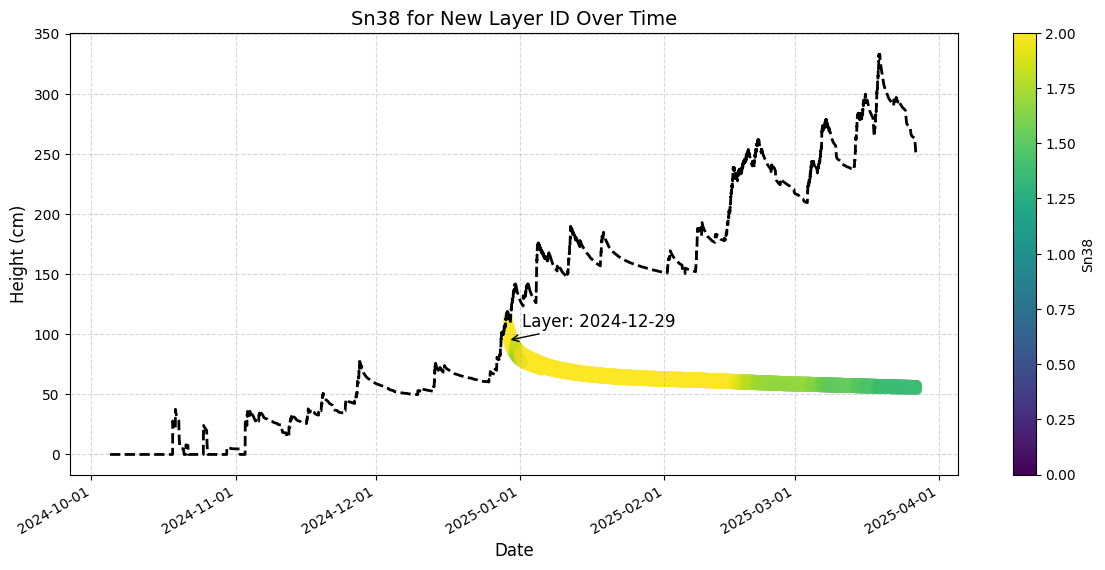

In [9]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(dates, hst, 'k--', linewidth=2)
scatter = None
for ii in range(new_layer_sn38.shape[1]):
    # Set alpha to 0.2 where sn38 > 1, else 0.8
    alphas = np.where(new_layer_sn38[:, ii] > 1, 0.05, 1)
    scatter = plt.scatter(
        new_layer_dt,
        new_layer_ht[:, ii],
        c=new_layer_sn38[:, ii],
        s=50,
        cmap='viridis',
        marker='o',
        alpha=alphas,
        edgecolors='none'
    )
    plt.clim([0, 2])
plt.colorbar(scatter, label='Sn38')
plt.clim([0, 2])
#plt.ylim([0, 300])
plt.xlabel("Date", fontsize=12)
plt.ylabel("Height (cm)", fontsize=12)
plt.title("Sn38 for New Layer ID Over Time", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Annotate the start of the scatter
plt.annotate(
    "Layer: {}".format(new_layer_dt[0].strftime('%Y-%m-%d')), 
    (new_layer_dt[0], new_layer_ht[0, 0]), 
    textcoords="offset points", 
    xytext=(10, 10), 
    ha='left', 
    fontsize=12, 
    color='black',
    arrowprops=dict(arrowstyle="->", color='black')
)

# Format x-axis for dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

Text(0.5, 1.0, 'Critical Cut Length for New Layer ID Over Time')

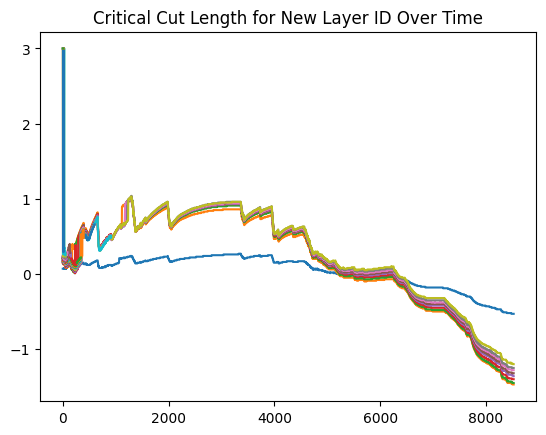

In [38]:


# Replace -999 with None in new_layer_rcl for plotting
plot_rcl = np.where(new_layer_rcl == -999, None, new_layer_rcl)
plt.plot(plot_rcl)
plt.title(f"Critical Cut Length for New Layer ID Over Time")


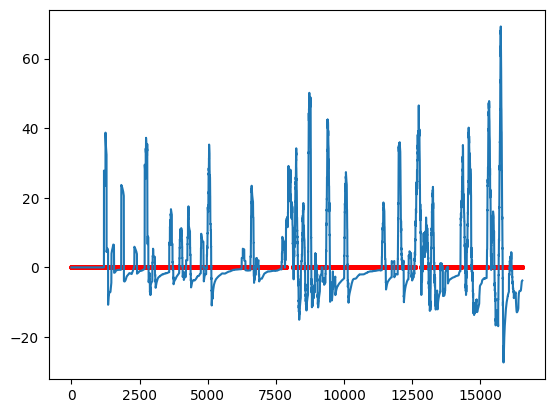

In [31]:

zero = np.zeros(len(dry_indices))
# The indices correspond to the start of the interval

plt.plot(diff_hst)
plt.scatter(dry_indices,zero,5,'r')


In [32]:


#plt.plot(hst)
#plt.scatter(dry_indices, zero, 5, "r")
plt.scatter(dates[dry_indices],hst[dry_indices], 5, "r")
plt.scatter(dates[accum_indices],hst[accum_indices], 5, "b")
#plt.plot(storm_end_index,hst[storm_end_index], 50, "ks")

TypeError: only integer scalar arrays can be converted to a scalar index

In [12]:
# all available dates
dates = pro.get_all_dates()

# will only return data above the ground after this
pro.discard_below_ground(True)

# get a Snowpack object (internal data class for Profiles) on a specific date
profile = pro.get_profile_on(dates[0])
profile2 = pro.get_profile_nr(12000) # easy acces to the xth profile

# convert it to a dataframe with minimum stability and surface hoar as metadata
# column names will be data codes, except for "0500"= height (layer boundaries)-> 2 columns: layer middle and layer thickness
profile2.toDf().head()


,layer middle,layer thickness,0502,0503,0504,0505,0506,0508,0509,0510,...,0532,0533,0534,0535,0601,0602,0603,0604,0605,0606
0,0.905,0.905,431.8,-0.03,1.0,111.55,0.0,0.0,1.00,3.3,...,1.27,1.23,-4.0,1.12,3.78,0.04,0.0,3.23,-384311.8,-999.00
1,3.050,1.240,425.5,-0.10,5.0,111.54,0.0,0.0,1.00,3.3,...,1.25,1.21,-4.0,1.17,3.66,0.06,0.0,3.21,-364497.9,0.23
2,5.170,0.880,418.4,-0.17,11.0,110.97,0.0,0.0,0.83,3.2,...,1.27,1.23,-4.0,1.12,3.53,0.04,0.0,3.23,-341933.7,0.25
3,6.605,0.555,423.2,-0.21,15.0,110.97,0.0,0.0,1.00,3.3,...,1.31,1.27,-4.0,1.18,3.62,0.30,1.0,3.27,-358859.3,-0.09
4,8.360,1.200,343.1,-0.28,17.0,110.96,0.0,0.0,1.00,3.0,...,1.80,1.74,-5.0,1.48,4.00,0.09,2.0,2.74,-232458.3,-0.07


In [4]:
wl = profile2.weak_layer
sh = profile2.surface_hoar

# There is help, to deal with the DataCodes:
# per default, the names are as in the .pro Header (without units)
pro.update_name_of_code("0503", "Snow Density")
density_code = pro.name_to_code("Snow Density")
                                
#convert to a dataframe, that has wl and sh integrated into the table
#profile2.toDf(integrate=True).head()

# May want to consider re-riting in pyspark
profile2.toDf(CodesToName=pro.DataCodes).head()

,layer middle,layer thickness,element density,Snow Density,element ID,element age,liquid water content by volume,dendricity,sphericity,coordination number,...,natural stability index Sn38,stability index Sk38,0534,optical equivalent grain size,snow shear strength,grain size difference,hardness difference,ssi,inverse texture index ITI,critical cut length
0,0.905,0.905,431.8,-0.03,1.0,111.55,0.0,0.0,1.00,3.3,...,1.27,1.23,-4.0,1.12,3.78,0.04,0.0,3.23,-384311.8,-999.00
1,3.050,1.240,425.5,-0.10,5.0,111.54,0.0,0.0,1.00,3.3,...,1.25,1.21,-4.0,1.17,3.66,0.06,0.0,3.21,-364497.9,0.23
2,5.170,0.880,418.4,-0.17,11.0,110.97,0.0,0.0,0.83,3.2,...,1.27,1.23,-4.0,1.12,3.53,0.04,0.0,3.23,-341933.7,0.25
3,6.605,0.555,423.2,-0.21,15.0,110.97,0.0,0.0,1.00,3.3,...,1.31,1.27,-4.0,1.18,3.62,0.30,1.0,3.27,-358859.3,-0.09
4,8.360,1.200,343.1,-0.28,17.0,110.96,0.0,0.0,1.00,3.0,...,1.80,1.74,-5.0,1.48,4.00,0.09,2.0,2.74,-232458.3,-0.07


In [ ]:
def parse_gtype(grain_code):
    """_summary_

    Args:
        grain_code (_type_): _description_

    Returns:
        _type_: _description_
    """
    try:
        primary_gtype = grain_code // 100
        secondary_gtype =  (grain_code % 100) // 10
        tertiary_gtype = grain_code % 10
    except:
         print("grain code parser failed")
         
    return primary_gtype,secondary_gtype, tertiary_gtype


def identify_surface_hoar(profile):
    """_summary_

    Args:
        profile (dataframe): snowpack profile 

    Returns:
       sh_likelihood (boolean): was surface hoar detected at the surface of the profile? 0 not 
    """
    #Swiss Code F1F2F3 Surface Hoar Code is 6, for more information on data formats see : https://snowpack.slf.ch/doc-release/html/snowpackio.html
    #initialize boolean
    sh_likelihood = 0
    try:
        primary_gtype,secondary_gtype, tertiary_gtype = parse_gtype(profile['0513'].iloc[-1])

        #type 4 = SH, type 5 is Depth hoar, type 6 is facets
        if primary_gtype == 4 or primary_gtype == 5 or primary_gtype == 6:
            sh_likelihood = 1
        elif secondary_gtype == 4 or secondary_gtype == 5 or secondary_gtype == 6:
            sh_likelihood = 2
        elif tertiary_gtype == 4 or tertiary_gtype == 5 or tertiary_gtype == 6:
            sh_likelihood = 3
        else:
            sh_likelihood = 0
    except:
        print("surface hoar detection failed")

    return sh_likelihood


In [28]:
profil_end = pro.get_profile_on(dates[4431]) #10990 corrsponds to Jan 27 2025, a period with surface hoar formation 
profile_df = profil_end.toDf()
profile_df.iloc[-1]
print(identify_surface_hoar(profile_df))

0


In [29]:
profile_df

,layer middle,layer thickness,0502,0503,0504,0505,0506,0508,0509,0510,...,0532,0533,0534,0535,0601,0602,0603,0604,0605,0606
0,1.105,1.105,353.8,-0.06,1.0,32.71,0.0,0.00,0.47,3.0,...,2.97,2.14,-3.0,0.63,2.48,0.01,0.0,4.14,-413182.9,-999.00
1,2.770,0.560,348.0,-0.14,5.0,32.71,0.0,0.00,0.46,3.0,...,2.90,2.05,-3.0,0.64,2.39,0.05,0.0,4.05,-400767.4,0.33
2,4.315,0.985,338.0,-0.22,7.0,32.70,0.0,0.00,0.46,2.9,...,2.85,1.97,-3.0,0.67,2.25,0.04,0.0,3.97,-367307.2,0.32
3,6.415,1.115,330.0,-0.34,11.0,32.12,0.0,0.00,0.44,2.9,...,2.98,2.00,-3.0,0.69,2.14,0.02,0.0,4.00,-344111.2,0.33
4,8.215,0.685,343.0,-0.43,15.0,32.12,0.0,0.00,0.90,3.0,...,3.36,2.20,-3.0,0.89,2.32,0.23,2.0,3.20,-364348.5,0.18
5,10.510,1.610,256.1,-0.57,17.0,32.11,0.0,0.00,0.93,2.6,...,2.83,1.77,-5.0,1.13,4.00,0.05,3.0,2.77,-218862.5,0.17
6,13.025,0.905,268.3,-0.72,21.0,29.88,0.0,0.00,0.22,2.7,...,2.00,1.21,-2.0,0.74,1.38,0.13,0.5,3.21,-219707.4,0.16
7,14.855,0.925,256.5,-0.84,23.0,29.86,0.0,0.00,0.18,2.6,...,2.08,1.21,-1.5,0.80,1.26,0.38,0.5,3.21,-189219.8,0.16
8,17.510,1.730,271.0,-1.01,24.0,26.11,0.0,0.00,0.32,2.7,...,2.32,1.26,-2.0,0.65,1.41,0.06,0.0,3.26,-276399.0,0.19
9,20.130,0.890,263.1,-1.19,28.0,26.11,0.0,0.00,0.30,2.7,...,2.24,1.15,-2.0,0.67,1.33,0.11,0.5,3.15,-253409.4,0.18


In [13]:
profile_df['layer thickness'].sum()

97.86

In [ ]:
def identify_near_surface_facets(profile,surface_depth = 50):
    """_summary_

    Args:
        profile (dataframe): snowpack profile 

    Returns:
       sh_likelihood (boolean): was surface hoar detected at the surface of the profile? 0 not 
    """
    #Swiss Code F1F2F3 Surface Hoar Code is 6, for more information on data formats see : https://snowpack.slf.ch/doc-release/html/snowpackio.html
    #initialize boolean
    sh_likelihood = 0
    try:
        search_depth = 0
        layer = len(profile) #start from second layer since first layer will be caught by SH detector

        #start search from top of snowpack
        while(search_depth<surface_depth):
            search_depth = search_depth + profile['layer thickness'].iloc[layer]
            primary_gtype,secondary_gtype, tertiary_gtype = profile['0513'].iloc[layer] #grab the variable at layer ii
            #type 4 = SH, type 5 is Depth hoar, type 6 is facets
            if primary_gtype == 4 or primary_gtype == 5 or primary_gtype == 6:
                sh_likelihood = 1
            elif secondary_gtype == 4 or secondary_gtype == 5 or secondary_gtype == 6:
                sh_likelihood = 2
            elif tertiary_gtype == 4 or tertiary_gtype == 5 or tertiary_gtype == 6:
                sh_likelihood = 3
            else:
                sh_likelihood = 0

    except:
        print("near surface facet search fail")

    return sh_likelihood


In [ ]:

def grain_formation_date(grain_type):

    return date, depth

In [ ]:
#Determine accumulation windows - start and end times

